In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv('data/cardata.csv')

In [3]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [4]:
df.tail()

,Car,Model,Volume,Weight,CO2
31,Volvo,XC70,2000,1746,117
32,Ford,B-Max,1600,1235,104
33,BMW,216,1600,1390,108
34,Opel,Zafira,1600,1405,109
35,Mercedes,SLK,2500,1395,120


In [5]:
df.shape

(36, 5)

In [6]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [7]:
X = df.drop(['CO2'], axis='columns')
y = df.CO2
X.head()

,Car,Model,Volume,Weight
0,Toyoty,Aygo,1000,790
1,Mitsubishi,Space Star,1200,1160
2,Skoda,Citigo,1000,929
3,Fiat,500,900,865
4,Mini,Cooper,1500,1140


In [8]:
X=pd.get_dummies(X)
X

,Volume,Weight,Car_Audi,Car_BMW,Car_Fiat,Car_Ford,Car_Honda,Car_Hundai,Car_Hyundai,Car_Mazda,...,Model_Octavia,Model_Rapid,Model_S60,Model_SLK,Model_Space Star,Model_Swift,Model_Up!,Model_V70,Model_XC70,Model_Zafira
0,1000,790,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1200,1160,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,1000,929,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,900,865,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1500,1140,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1000,929,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6,1400,1109,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1500,1365,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1500,1112,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1600,1150,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


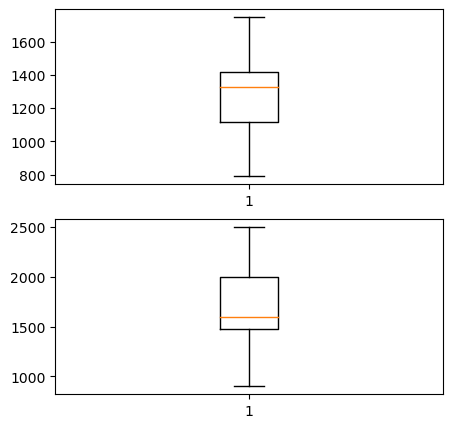

In [9]:
fig, ax = plt.subplots(2, figsize = (5,5))
ax[0].boxplot(df['Weight'])
ax[1].boxplot(df['Volume'])
plt.show()

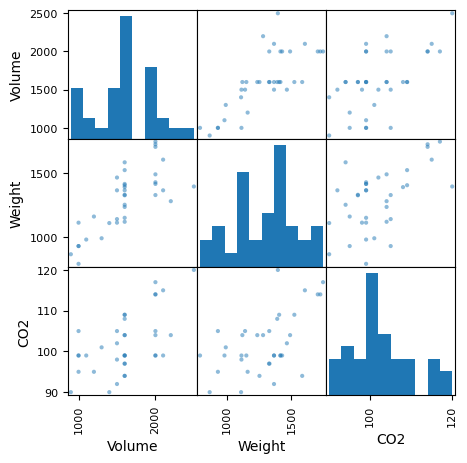

In [18]:
scatter_matrix(df, figsize=(5, 5))
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 80.37066733935161
slope: [-2.00000000e-03  1.91102739e-02  1.28425456e+00  6.56447401e+00
 -2.69690596e+00  1.33802782e+00 -3.62005737e+00 -2.49316426e+00
 -5.52318237e-03  1.46435879e+00  7.42927499e-01  2.99747378e+00
 -2.46583923e+00  3.04889749e-02 -2.03309467e+00  2.01600653e+00
  2.75369057e+00  4.43562262e+00 -6.59163518e-01 -4.23536598e-02
 -2.29842213e+00  2.10382323e+00 -1.51815842e+00 -2.40414834e+00
 -1.21991188e+01 -1.43173693e+00 -2.12923007e+00  3.37985556e+00
  0.00000000e+00  2.77852567e+00  1.89011652e+00  0.00000000e+00
 -4.11014616e+00  0.00000000e+00 -3.47667294e+00  2.84614659e+00
  0.00000000e+00 -6.73086647e+00 -1.95931978e+00  1.91286105e+00
  0.00000000e+00 -3.01772632e+00 -4.69062750e+00  0.00000000e+00
 -3.17861029e+00  7.47803079e+00 -3.75254145e+00  1.72275730e+01
 -2.67274588e+00  2.29415493e+00  4.44026555e+00  3.38354897e+00
  0.00000000e+00  4.94890880e+00]


In [14]:
yhat = model.predict(X_test)  
xhat = model.predict(X_train) 

In [15]:
print("Prediction for test set: {}".format(yhat))

Prediction for test set: [109.07804212 108.77936908 109.77831162 107.58558451 102.99911877
 102.61782066  96.89321262  94.09101716]


In [16]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': yhat})
reg_model_diff

,Actual value,Predicted value
31,117,109.078042
20,94,108.779369
16,99,109.778312
30,115,107.585585
22,99,102.999119
15,97,102.617821
10,99,96.893213
2,95,94.091017


In [17]:
MAE = metrics.mean_absolute_error(y_test, yhat)
MSE = metrics.mean_squared_error(y_test, yhat)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, yhat))

print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', RMSE)

Mean Absolute Error: 6.690845464389845
Mean Square Error: 63.143798526781325
Root Mean Square Error: 7.946307225798743
